In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
debug = False
if debug:
    file_name = 'debug_data.pkl'
else:
    file_name = 'data.pkl'

In [3]:
df = pd.read_pickle('./Data/Rawdata/' + file_name)
df.head()

,borough,bin_#,house_#,street_name,job_#,job_doc._#,job_type,self_cert,block,lot,...,owner’s_house_state,owner’s_house_zip_code,owner's_phone_#,dobrundate,permit_si_no,latitude,longitude,council_district,census_tract,nta_name
0,MANHATTAN,1088749,1,MADISON AVE,141008987,1,A3,Y,00853,00002,...,NaN,<NA>,2125942700,2022-05-11,3905851,40.740909,-73.987947,2.0,56.0,Hudson Yards-Chelsea-Flatiron-Union Square
1,STATEN ISLAND,5076937,87,BOYLAN STREET,540218539,1,A2,Y,05687,00066,...,NaN,<NA>,9174201655,2022-05-11,3905852,40.563654,-74.179584,51.0,17008.0,Arden Heights
2,STATEN ISLAND,5001506,217,LAFAYETTE AVENUE,540218575,1,A2,Y,00064,00022,...,NaN,<NA>,7188125847,2022-05-11,3905853,40.639633,-74.094169,49.0,81.0,West New Brighton-New Brighton-St. George
3,STATEN ISLAND,5067021,170,OAKDALE STREET,540218600,1,A2,Y,05260,00001,...,NaN,<NA>,3478575846,2022-05-11,3905854,40.544597,-74.157153,51.0,15601.0,Great Kills
4,STATEN ISLAND,5058036,273,10 STREET,540218628,1,A2,Y,04242,00045,...,NaN,<NA>,7186195891,2022-05-11,3905855,40.566798,-74.119726,50.0,134.0,New Dorp-Midland Beach


In [7]:
# These are the feature to keep from the project description provided
columns_to_keep = ['borough', 'job_type', 'block', 'lot', 'zip_code', 'work_type', 'bldg_type', "owner's_business_type", 
                   'non-profit', 'latitude', 'longitude', 'council_district', 'issuance_date', 'job_start_date', 
                   'permit_type']
df = df[columns_to_keep]
df.head()

,borough,job_type,block,lot,zip_code,work_type,bldg_type,owner's_business_type,non-profit,latitude,longitude,council_district,issuance_date,job_start_date,permit_type
0,MANHATTAN,A3,00853,00002,10010.0,EQ,2.0,CORPORATION,N,40.740909,-73.987947,2.0,2022-05-10,2022-05-10,EQ
1,STATEN ISLAND,A2,05687,00066,10312.0,OT,1.0,INDIVIDUAL,N,40.563654,-74.179584,51.0,2022-05-10,2022-05-12,EW
2,STATEN ISLAND,A2,00064,00022,10301.0,OT,1.0,INDIVIDUAL,N,40.639633,-74.094169,49.0,2022-05-10,2022-05-15,EW
3,STATEN ISLAND,A2,05260,00001,10308.0,OT,1.0,INDIVIDUAL,N,40.544597,-74.157153,51.0,2022-05-10,2022-05-15,EW
4,STATEN ISLAND,A2,04242,00045,10306.0,OT,1.0,INDIVIDUAL,N,40.566798,-74.119726,50.0,2022-05-10,2022-05-24,EW


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952399 entries, 0 to 3952398
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   borough                category      
 1   job_type               category      
 2   block                  string        
 3   lot                    string        
 4   zip_code               string        
 5   work_type              category      
 6   bldg_type              category      
 7   owner's_business_type  category      
 8   non-profit             category      
 9   latitude               float64       
 10  longitude              float64       
 11  council_district       category      
 12  issuance_date          datetime64[ns]
 13  job_start_date         datetime64[ns]
 14  permit_type            category      
dtypes: category(8), datetime64[ns](2), float64(2), string(3)
memory usage: 241.2 MB


In [9]:
df.nunique()

borough                       5
job_type                      6
block                     13908
lot                        2083
zip_code                    229
work_type                    13
bldg_type                     2
owner's_business_type        15
non-profit                    4
latitude                 235008
longitude                248591
council_district             51
issuance_date             10041
job_start_date            10964
permit_type                   8
dtype: int64

In [10]:
df.isna().sum()

borough                       0
job_type                      0
block                       495
lot                         504
zip_code                   1205
work_type                711038
bldg_type                 57389
owner's_business_type    171555
non-profit               167284
latitude                  11523
longitude                 11523
council_district          11523
issuance_date             20321
job_start_date               45
permit_type                   1
dtype: int64

In [11]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032826 entries, 0 to 3032825
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   borough                category      
 1   job_type               category      
 2   block                  string        
 3   lot                    string        
 4   zip_code               string        
 5   work_type              category      
 6   bldg_type              category      
 7   owner's_business_type  category      
 8   non-profit             category      
 9   latitude               float64       
 10  longitude              float64       
 11  council_district       category      
 12  issuance_date          datetime64[ns]
 13  job_start_date         datetime64[ns]
 14  permit_type            category      
dtypes: category(8), datetime64[ns](2), float64(2), string(3)
memory usage: 185.1 MB


In [12]:
df['block'] = df['block'].astype('category')
df['lot'] = df['lot'].astype('category')
df['zip_code'] = df['zip_code'].astype('category')

In [14]:
df.dtypes

borough                        category
job_type                       category
block                          category
lot                            category
zip_code                       category
work_type                      category
bldg_type                      category
owner's_business_type          category
non-profit                     category
latitude                        float64
longitude                       float64
council_district               category
issuance_date            datetime64[ns]
job_start_date           datetime64[ns]
permit_type                    category
dtype: object

In [15]:
df.describe()

,latitude,longitude
count,3.032826e+06,3.032826e+06
mean,4.072846e+01,-7.394651e+01
std,7.040340e-02,7.906478e-02
min,4.049881e+01,-7.425490e+01
25%,4.068870e+01,-7.398861e+01
50%,4.073874e+01,-7.396373e+01
75%,4.076743e+01,-7.391027e+01
max,4.091371e+01,-7.370038e+01


In [16]:
df.permit_type.value_counts()

EW    1667670
PL     709941
EQ     547652
AL     107562
NB          1
DM          0
FO          0
SG          0
Name: permit_type, dtype: int64

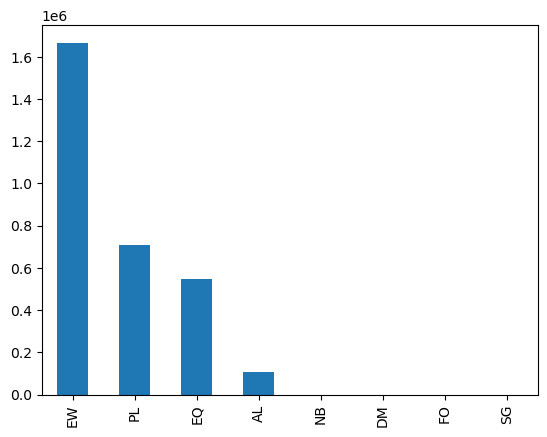

In [17]:
df.permit_type.value_counts().plot(kind='bar')
plt.show()

MANHATTAN        1360793
BROOKLYN          695789
QUEENS            590435
BRONX             249417
STATEN ISLAND     136392
Name: borough, dtype: int64



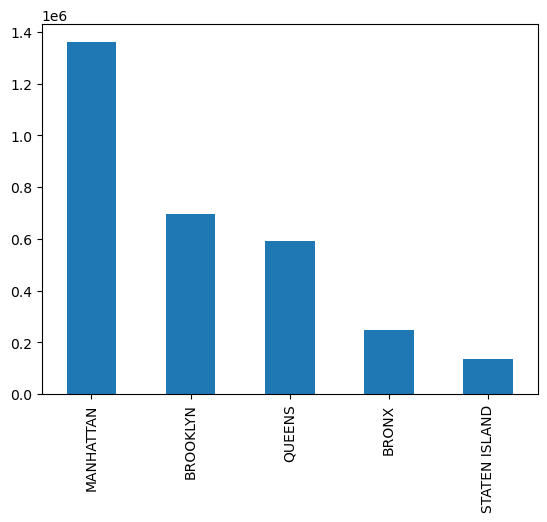





A2    2210333
A3     396922
NB     236481
A1     161302
DM      27772
SG         16
Name: job_type, dtype: int64



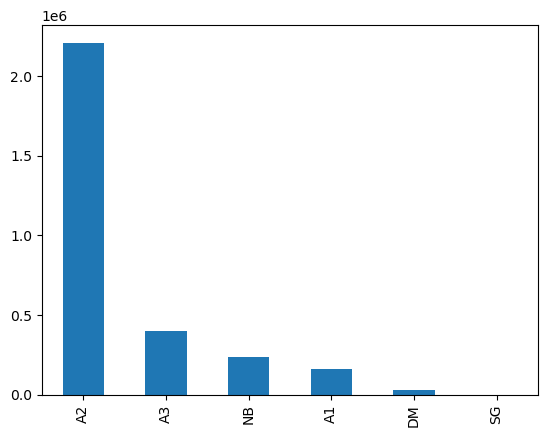





OT    1123285
PL     709941
EQ     547652
MH     283060
SP     132981
BL      73690
FP      64203
FB      40701
FS      23595
SD      21828
CC      11650
FA        239
NB          1
Name: work_type, dtype: int64



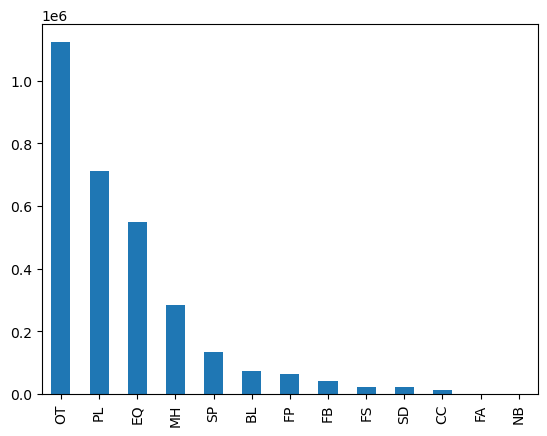





2.0    2414513
1.0     618313
Name: bldg_type, dtype: int64



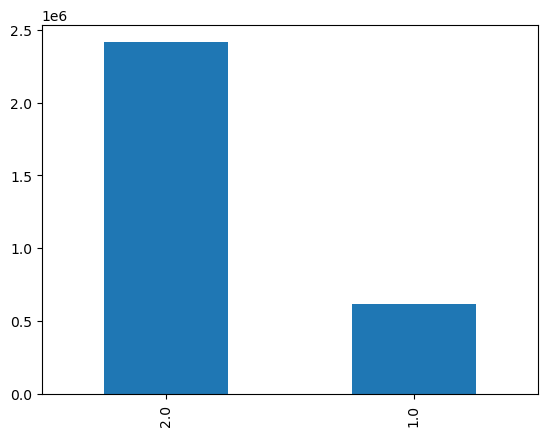





CORPORATION            1032705
INDIVIDUAL              940870
PARTNERSHIP             714609
OTHER                   119102
CONDO/CO-OP             104028
OTHER GOV'T AGENCY       69976
NYCHA/HHC                18609
NYCHA                    12655
NYC AGENCY               11749
HPD                       4228
HHC                       1211
DCAS                      1148
NY STATE                   987
DOE                        949
2022-05-09 00:00:00          0
Name: owner's_business_type, dtype: int64



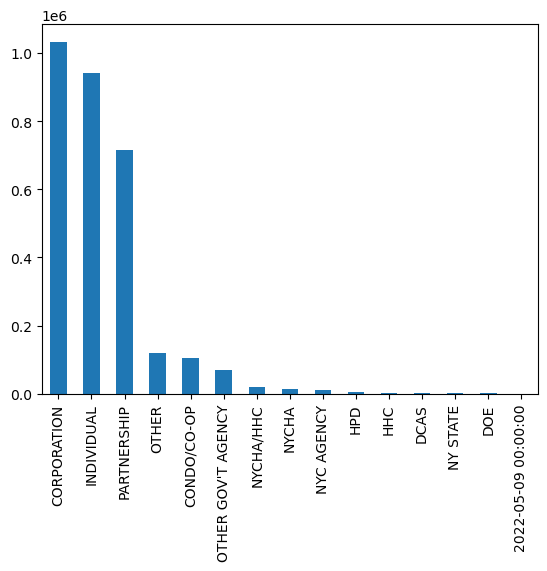





N    2836192
Y     196634
8          0
          0
Name: non-profit, dtype: int64



C:\Users\manda\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


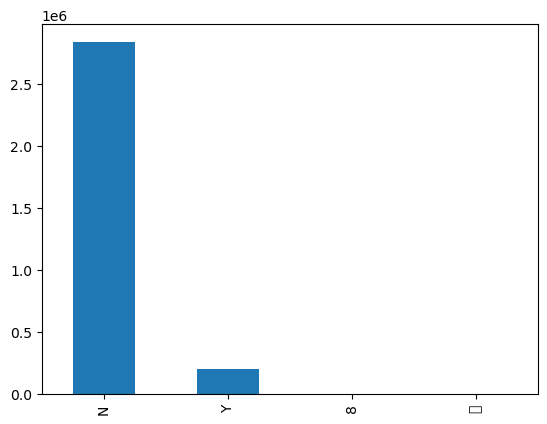





4.0     384776
3.0     251788
1.0     213234
2.0     133279
6.0     118763
33.0     99380
5.0      85926
39.0     68654
26.0     60390
19.0     59632
34.0     58427
9.0      57276
35.0     54473
7.0      54160
38.0     50126
20.0     49361
51.0     48904
36.0     47775
50.0     47762
8.0      46577
22.0     45155
32.0     43153
31.0     40871
48.0     40749
43.0     40385
49.0     39726
17.0     39710
24.0     39337
23.0     37382
29.0     37345
28.0     37264
47.0     37197
44.0     36216
10.0     35803
30.0     35734
37.0     35501
27.0     35166
21.0     33543
13.0     31629
11.0     30838
42.0     29684
25.0     29134
41.0     28920
15.0     28737
46.0     26910
12.0     26302
40.0     25585
16.0     24957
18.0     24397
45.0     23834
14.0     20999
Name: council_district, dtype: int64



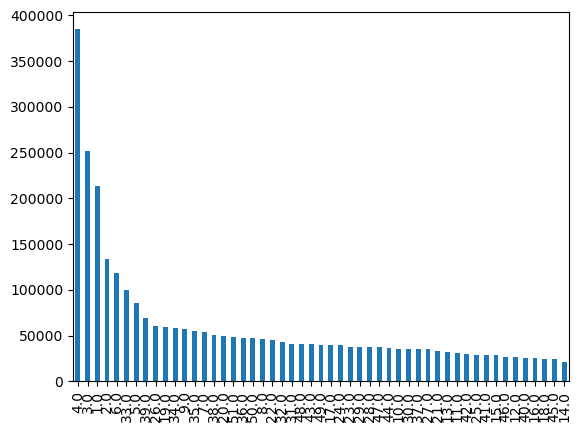

In [18]:
categorical_features = ['borough', 'job_type', 'work_type', 'bldg_type', "owner's_business_type", 'non-profit', 
                        'council_district']

for feature in categorical_features:
    print(df[feature].value_counts(), end='\n\n')
    df[feature].value_counts().plot(kind='bar')
    plt.show()
    print('\n\n\n')

In [19]:
df.zip_code.value_counts()

10022.0    80768
10019.0    66250
10013.0    62258
10011.0    61875
10003.0    60737
           ...  
10045.0       18
11695.0       16
11371.0        9
10048.0        9
91217.0        1
Name: zip_code, Length: 225, dtype: int64

In [20]:
df['issuance_year'] = df.issuance_date.dt.year
df['issuance_month'] = df.issuance_date.dt.month
df['issuance_day'] = df.issuance_date.dt.day

df['job_start_year'] = df.job_start_date.dt.year
df['job_start_month'] = df.job_start_date.dt.month
df['job_start_day'] = df.job_start_date.dt.day

In [21]:
correlation_matrix = df.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
correlation_matrix

,borough,job_type,block,lot,zip_code,work_type,bldg_type,owner's_business_type,non-profit,latitude,...,council_district,issuance_date,job_start_date,permit_type,issuance_year,issuance_month,issuance_day,job_start_year,job_start_month,job_start_day
borough,1.000000,0.163598,0.322044,0.091696,0.214378,-0.024545,0.332768,0.068709,0.045713,0.322134,...,0.388546,-0.016452,-0.007848,0.046610,-0.022997,0.001281,0.001101,0.010561,-0.004020,0.001041
job_type,0.163598,1.000000,0.106854,0.049101,0.023631,-0.004813,0.317470,-0.062922,-0.024946,0.141622,...,0.015404,-0.023471,-0.000526,0.097920,0.000360,0.001267,-0.001012,0.065948,0.000843,0.000100
block,0.322044,0.106854,1.000000,0.023996,0.103648,-0.019012,0.231525,-0.017926,0.005541,0.229306,...,0.104238,0.003890,0.016837,0.037613,0.003046,0.005258,0.000211,0.029639,-0.000342,-0.000226
lot,0.091696,0.049101,0.023996,1.000000,0.076161,-0.011526,0.123811,-0.028285,-0.019578,0.100976,...,0.041347,0.001877,0.001824,0.019927,-0.000596,0.000873,-0.000516,0.004083,-0.002296,-0.000195
zip_code,0.214378,0.023631,0.103648,0.076161,1.000000,0.019965,0.045792,0.023339,0.017434,0.040855,...,0.200695,-0.001833,0.008030,0.016190,0.002406,0.000814,0.001078,0.015454,-0.001241,0.000446
work_type,-0.024545,-0.004813,-0.019012,-0.011526,0.019965,1.000000,-0.130989,-0.046664,0.000642,-0.036893,...,-0.004861,0.020245,0.035069,0.242020,0.054838,0.002206,0.000974,0.052077,0.008303,0.001371
bldg_type,0.332768,0.317470,0.231525,0.123811,0.045792,-0.130989,1.000000,-0.086689,-0.067933,0.336984,...,0.017557,-0.028864,-0.028127,0.094946,-0.033828,0.002280,0.000280,-0.004746,-0.002603,-0.000858
owner's_business_type,0.068709,-0.062922,-0.017926,-0.028285,0.023339,-0.046664,-0.086689,1.000000,0.232540,-0.059078,...,0.078908,-0.000234,0.012057,-0.059234,0.005408,-0.000959,-0.001792,0.013589,-0.002910,0.001165
non-profit,0.045713,-0.024946,0.005541,-0.019578,0.017434,0.000642,-0.067933,0.232540,1.000000,-0.028137,...,0.064843,-0.004854,0.011552,-0.026062,0.005597,0.001760,-0.000826,0.027169,-0.003786,-0.001027
latitude,0.322134,0.141622,0.229306,0.100976,0.040855,-0.036893,0.336984,-0.059078,-0.028137,1.000000,...,0.140237,0.050388,0.013931,0.053754,-0.011435,0.006826,-0.002076,-0.049214,-0.000118,-0.000915


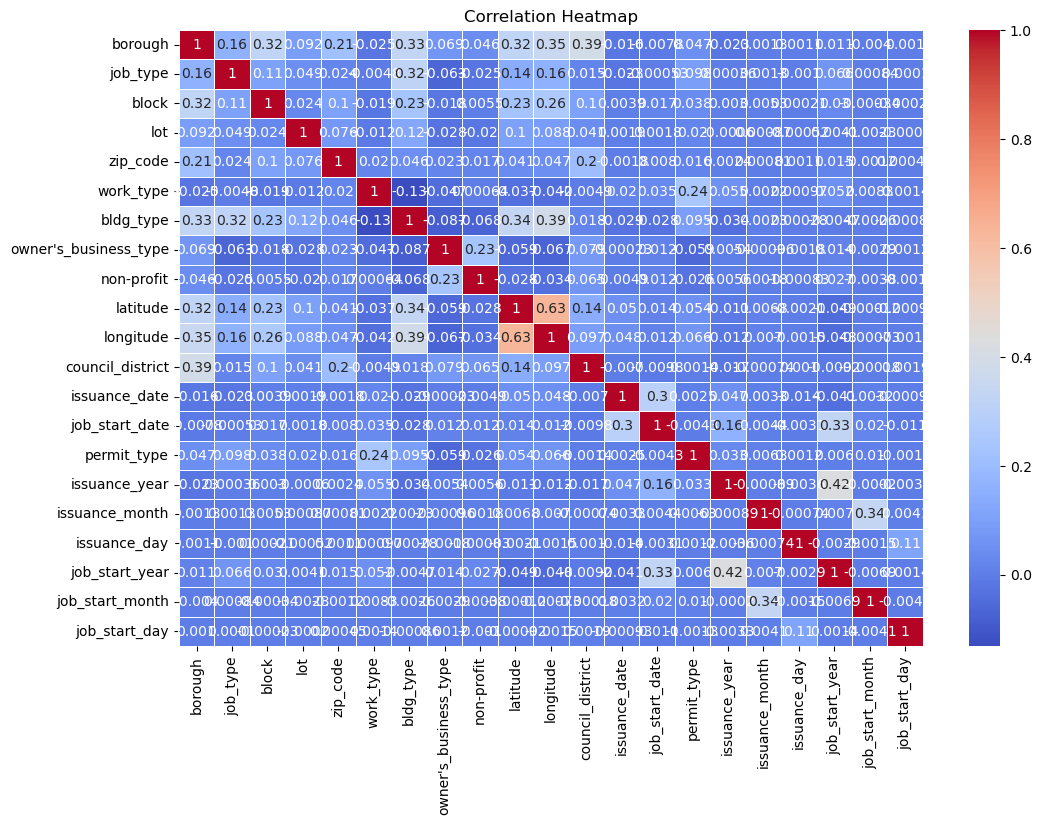

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [24]:
X = df[['borough', 'job_type', 'block', 'lot', 'zip_code', 'work_type', 'bldg_type',
        "owner's_business_type", 'non-profit', 'latitude', 'longitude',
        'council_district', 'issuance_year', 'issuance_month', 'issuance_day', 'job_start_year', 'job_start_month', 
        'job_start_day']]
y = df['permit_type']

In [25]:
le = LabelEncoder()
X['borough'] = le.fit_transform(X['borough'])
X['job_type'] = le.fit_transform(X['job_type'])
X["owner's_business_type"] = le.fit_transform(X["owner's_business_type"])
X['work_type'] = le.fit_transform(X['work_type'])
X['bldg_type'] = le.fit_transform(X['bldg_type'])
X['block'] = le.fit_transform(X['block'])
X['lot'] = le.fit_transform(X['lot'])
X['zip_code'] = le.fit_transform(X['zip_code'])
X['non-profit'] = le.fit_transform(X['non-profit'])

C:\Users\manda\AppData\Local\Temp\ipykernel_35660\1511893981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['borough'] = le.fit_transform(X['borough'])
C:\Users\manda\AppData\Local\Temp\ipykernel_35660\1511893981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job_type'] = le.fit_transform(X['job_type'])
C:\Users\manda\AppData\Local\Temp\ipykernel_35660\1511893981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [26]:
#list for cols to scale
cols_to_scale = ['latitude', 'longitude', 'council_district', 'issuance_year',
                 'issuance_month', 'issuance_day', 'job_start_year', 'job_start_month', 'job_start_day']

#create and fit scaler
scaler = StandardScaler()

#scale selected data
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

C:\Users\manda\AppData\Local\Temp\ipykernel_35660\2533103776.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\manda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [27]:
with open('./Data/log_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [28]:
with open('./Data/log_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [29]:
y_pred = model.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

0.6849361817180653

In [34]:
f1_score(y_test, y_pred, average='weighted')

0.6014766613164273

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032826 entries, 0 to 3032825
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   borough                int32  
 1   job_type               int32  
 2   block                  int32  
 3   lot                    int32  
 4   zip_code               int32  
 5   work_type              int32  
 6   bldg_type              int64  
 7   owner's_business_type  int32  
 8   non-profit             int32  
 9   latitude               float64
 10  longitude              float64
 11  council_district       float64
 12  issuance_year          float64
 13  issuance_month         float64
 14  issuance_day           float64
 15  job_start_year         float64
 16  job_start_month        float64
 17  job_start_day          float64
dtypes: float64(9), int32(8), int64(1)
memory usage: 323.9 MB


# Fit Deep Learning Model

## Model Definition

In [28]:
import os
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader

In [30]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(18, 512),  
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 4),  
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return nn.functional.softmax(logits, dim=1)  

## Preparing Data For Training (Without BN, n=64)

In [31]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [97]:
# Creating TensorDatasets
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# Creating DataLoaders
batch_size = 64  
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

## Model Training (Without BN, n=64)

In [98]:
model = NeuralNetwork()

In [99]:
# Cross-Entropy as loss function
criterion = nn.CrossEntropyLoss()
# Adam as optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [100]:
num_epochs = 50  # Number of training epochs. Adjust as needed.

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for X_batch, y_batch in train_loader:
        # Forward pass: Compute predictions and loss
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()  # Clear existing gradients
        loss.backward()       # Backpropagation
        optimizer.step()      # Update weights

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/50], Loss: 1.1008
Epoch [2/50], Loss: 1.1722
Epoch [3/50], Loss: 0.9580
Epoch [4/50], Loss: 1.1722
Epoch [5/50], Loss: 1.0294
Epoch [6/50], Loss: 1.0294
Epoch [7/50], Loss: 0.9580
Epoch [8/50], Loss: 0.9580
Epoch [9/50], Loss: 1.1008
Epoch [10/50], Loss: 1.1008
Epoch [11/50], Loss: 1.1008
Epoch [12/50], Loss: 0.9580
Epoch [13/50], Loss: 0.9580
Epoch [14/50], Loss: 0.9580
Epoch [15/50], Loss: 1.1722
Epoch [16/50], Loss: 1.0294
Epoch [17/50], Loss: 0.8865
Epoch [18/50], Loss: 1.1008
Epoch [19/50], Loss: 1.0294
Epoch [20/50], Loss: 0.9580
Epoch [21/50], Loss: 0.9580
Epoch [22/50], Loss: 1.1722
Epoch [23/50], Loss: 0.8151
Epoch [24/50], Loss: 1.2437
Epoch [25/50], Loss: 1.0294
Epoch [26/50], Loss: 0.9580
Epoch [27/50], Loss: 1.0294
Epoch [28/50], Loss: 1.3151
Epoch [29/50], Loss: 1.0294
Epoch [30/50], Loss: 0.8865
Epoch [31/50], Loss: 0.9580
Epoch [32/50], Loss: 0.9580
Epoch [33/50], Loss: 1.1722
Epoch [34/50], Loss: 1.0294
Epoch [35/50], Loss: 0.8865
Epoch [36/50], Loss: 1.1008
E

In [101]:
model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
accuracy


0.7135794330916282

# Deep Learning Model (BN applied, n=64)

In [102]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(18, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 4),  
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return nn.functional.softmax(logits, dim=1)  

# Preparing Data for Training (BN applied, n=64)

In [103]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [105]:
# Creating TensorDatasets
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# Creating DataLoaders
batch_size = 64  
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Model Training (BN applied, n=64)

In [106]:
model = NeuralNetwork()

In [107]:
# Cross-Entropy as loss function
criterion = nn.CrossEntropyLoss()
# Adam as optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [108]:
num_epochs = 50  # Number of training epochs. Adjust as needed.

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for X_batch, y_batch in train_loader:
        # Forward pass: Compute predictions and loss
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()  # Clear existing gradients
        loss.backward()       # Backpropagation
        optimizer.step()      # Update weights

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/50], Loss: 0.8182
Epoch [2/50], Loss: 1.2298
Epoch [3/50], Loss: 0.9692
Epoch [4/50], Loss: 0.9981
Epoch [5/50], Loss: 0.8459
Epoch [6/50], Loss: 1.0294
Epoch [7/50], Loss: 0.7437
Epoch [8/50], Loss: 0.8151
Epoch [9/50], Loss: 0.8473
Epoch [10/50], Loss: 1.0581
Epoch [11/50], Loss: 0.8289
Epoch [12/50], Loss: 0.8184
Epoch [13/50], Loss: 0.9109
Epoch [14/50], Loss: 0.7888
Epoch [15/50], Loss: 0.7438
Epoch [16/50], Loss: 0.8151
Epoch [17/50], Loss: 0.8657
Epoch [18/50], Loss: 0.7459
Epoch [19/50], Loss: 0.8151
Epoch [20/50], Loss: 0.8151
Epoch [21/50], Loss: 1.0731
Epoch [22/50], Loss: 0.9912
Epoch [23/50], Loss: 0.8865
Epoch [24/50], Loss: 1.4504
Epoch [25/50], Loss: 0.7438
Epoch [26/50], Loss: 0.7579
Epoch [27/50], Loss: 0.8865
Epoch [28/50], Loss: 0.7437
Epoch [29/50], Loss: 0.7440
Epoch [30/50], Loss: 1.2469
Epoch [31/50], Loss: 0.7437
Epoch [32/50], Loss: 0.7437
Epoch [33/50], Loss: 0.7437
Epoch [34/50], Loss: 0.7438
Epoch [35/50], Loss: 0.7437
Epoch [36/50], Loss: 0.7437
E

In [109]:
model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
accuracy


0.9734673698088332

# Deep Learning (without BN, n=256)

In [110]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [112]:
# Creating TensorDatasets
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# Creating DataLoaders
batch_size = 256 
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

## Model Training (Without BN, n=256)

In [113]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(18, 512),  
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 4),  
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return nn.functional.softmax(logits, dim=1)  

In [114]:
model = NeuralNetwork()

In [115]:
# Cross-Entropy as loss function
criterion = nn.CrossEntropyLoss()
# Adam as optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [116]:
num_epochs = 50  # Number of training epochs. Adjust as needed.

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for X_batch, y_batch in train_loader:
        # Forward pass: Compute predictions and loss
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()  # Clear existing gradients
        loss.backward()       # Backpropagation
        optimizer.step()      # Update weights

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/50], Loss: 1.0738
Epoch [2/50], Loss: 1.0107
Epoch [3/50], Loss: 1.0446
Epoch [4/50], Loss: 1.0852
Epoch [5/50], Loss: 1.0446
Epoch [6/50], Loss: 1.0446
Epoch [7/50], Loss: 1.0349
Epoch [8/50], Loss: 1.0301
Epoch [9/50], Loss: 1.0107
Epoch [10/50], Loss: 1.0786
Epoch [11/50], Loss: 1.0010
Epoch [12/50], Loss: 1.0446
Epoch [13/50], Loss: 1.0641
Epoch [14/50], Loss: 1.0204
Epoch [15/50], Loss: 1.0786
Epoch [16/50], Loss: 1.0155
Epoch [17/50], Loss: 1.0786
Epoch [18/50], Loss: 1.0058
Epoch [19/50], Loss: 1.0786
Epoch [20/50], Loss: 1.0786
Epoch [21/50], Loss: 1.0738
Epoch [22/50], Loss: 1.1077
Epoch [23/50], Loss: 0.9912
Epoch [24/50], Loss: 1.0543
Epoch [25/50], Loss: 1.0689
Epoch [26/50], Loss: 1.0495
Epoch [27/50], Loss: 1.0495
Epoch [28/50], Loss: 1.0155
Epoch [29/50], Loss: 1.0058
Epoch [30/50], Loss: 1.0252
Epoch [31/50], Loss: 1.0058
Epoch [32/50], Loss: 1.0495
Epoch [33/50], Loss: 1.0252
Epoch [34/50], Loss: 0.9670
Epoch [35/50], Loss: 1.0349
Epoch [36/50], Loss: 1.0204
E

In [117]:
model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
accuracy


0.7142386288727752

# Preparing Data for Training (BN applied, n=256)

In [118]:
X_tensor = torch.tensor(X.values, dtype=torch.float32)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [120]:
# Creating TensorDatasets
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# Creating DataLoaders
batch_size = 256
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Model Training (BN applied, n=256)

In [121]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(18, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 4),  
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return nn.functional.softmax(logits, dim=1)  

In [122]:
model = NeuralNetwork()

In [123]:
# Cross-Entropy as loss function
criterion = nn.CrossEntropyLoss()
# Adam as optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [124]:
num_epochs = 50  # Number of training epochs. Adjust as needed.

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for X_batch, y_batch in train_loader:
        # Forward pass: Compute predictions and loss
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()  # Clear existing gradients
        loss.backward()       # Backpropagation
        optimizer.step()      # Update weights

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/50], Loss: 0.8236
Epoch [2/50], Loss: 0.8297
Epoch [3/50], Loss: 0.8071
Epoch [4/50], Loss: 0.8063
Epoch [5/50], Loss: 0.8312
Epoch [6/50], Loss: 0.8411
Epoch [7/50], Loss: 0.8340
Epoch [8/50], Loss: 0.8457
Epoch [9/50], Loss: 0.8165
Epoch [10/50], Loss: 0.7933
Epoch [11/50], Loss: 0.8315
Epoch [12/50], Loss: 0.8311
Epoch [13/50], Loss: 0.8117
Epoch [14/50], Loss: 0.7826
Epoch [15/50], Loss: 0.8165
Epoch [16/50], Loss: 0.8020
Epoch [17/50], Loss: 0.8311
Epoch [18/50], Loss: 0.8262
Epoch [19/50], Loss: 0.8359
Epoch [20/50], Loss: 0.8748
Epoch [21/50], Loss: 0.8651
Epoch [22/50], Loss: 0.8311
Epoch [23/50], Loss: 0.8117
Epoch [24/50], Loss: 0.7971
Epoch [25/50], Loss: 0.8165
Epoch [26/50], Loss: 0.7971
Epoch [27/50], Loss: 0.7825
Epoch [28/50], Loss: 0.8359
Epoch [29/50], Loss: 0.8311
Epoch [30/50], Loss: 0.8408
Epoch [31/50], Loss: 0.8262
Epoch [32/50], Loss: 0.8262
Epoch [33/50], Loss: 0.7922
Epoch [34/50], Loss: 0.8165
Epoch [35/50], Loss: 0.8456
Epoch [36/50], Loss: 0.7922
E

In [125]:
model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
accuracy


0.9241924851680949